# Import Packages

In [342]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import statsmodels.api as sm
import itertools
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Load Data

In [344]:
df = pd.read_csv('Rakamin Bootcamp - Dataset - Promotion Dataset.csv')
df.head()

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible
0,EMP0001,24.0,21.0,2.0,44.0,42.0,19.0,61.0,Junior,0.0
1,EMP0002,50.0,8.0,5.0,45.0,66.0,11.0,6.0,Junior,0.0
2,EMP0003,56.0,9.0,5.0,19.0,96.0,6.0,86.0,Lead,0.0
3,EMP0004,39.0,24.0,4.0,51.0,16.0,6.0,52.0,Senior,0.0
4,EMP0005,41.0,NaN,4.0,64.0,57.0,16.0,59.0,Junior,0.0


# Basic Analysis

## Numeric Analysis

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employee_ID             1000 non-null   object 
 1   Age                     950 non-null    float64
 2   Years_at_Company        951 non-null    float64
 3   Performance_Score       950 non-null    float64
 4   Leadership_Score        950 non-null    float64
 5   Training_Hours          950 non-null    float64
 6   Projects_Handled        950 non-null    float64
 7   Peer_Review_Score       950 non-null    float64
 8   Current_Position_Level  950 non-null    object 
 9   Promotion_Eligible      950 non-null    float64
dtypes: float64(8), object(2)
memory usage: 78.3+ KB


In [256]:
df.describe()

,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible
count,950.000000,951.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,40.940000,14.968454,2.969474,50.117895,109.286316,10.016842,51.227368,0.294737
std,12.863864,9.319084,1.417977,28.668058,184.616517,5.666507,29.141002,0.456165
min,-3.000000,-5.000000,1.000000,0.000000,-50.000000,0.000000,0.000000,0.000000
25%,31.000000,7.000000,2.000000,25.000000,51.250000,5.000000,25.000000,0.000000
50%,41.000000,15.000000,3.000000,51.000000,102.500000,10.000000,51.000000,0.000000
75%,50.000000,23.000000,4.000000,75.000000,150.750000,15.000000,78.000000,1.000000
max,200.000000,100.000000,5.000000,99.000000,5000.000000,19.000000,99.000000,1.000000


In [257]:
df['Current_Position_Level'].describe()

,Current_Position_Level
count,950
unique,4
top,Mid
freq,248


In [258]:
df[df["Promotion_Eligible"] == 1].describe()

,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible
count,265.000000,265.000000,266.000000,267.000000,259.000000,269.000000,271.000000,280.0
mean,40.807547,14.147170,2.917293,48.569288,105.332046,10.431227,51.966790,1.0
std,16.057565,9.159624,1.398355,29.374524,143.315820,5.330137,28.669425,0.0
min,22.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,30.000000,6.000000,2.000000,25.000000,47.500000,6.000000,26.500000,1.0
50%,41.000000,14.000000,3.000000,49.000000,91.000000,10.000000,51.000000,1.0
75%,49.000000,22.000000,4.000000,74.000000,146.000000,15.000000,78.000000,1.0
max,200.000000,40.000000,5.000000,99.000000,2000.000000,19.000000,98.000000,1.0


In [259]:
df.loc[df["Promotion_Eligible"] == 1, "Current_Position_Level"].describe()

,Current_Position_Level
count,273
unique,4
top,Mid
freq,78


In [260]:
df[df["Promotion_Eligible"] == 0].describe()

,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible
count,635.000000,638.000000,636.000000,636.000000,644.000000,634.000000,631.000000,670.0
mean,41.025197,15.213166,2.981132,50.820755,112.237578,9.763407,50.759113,0.0
std,11.420663,9.413659,1.435091,28.128769,204.376565,5.749993,29.116225,0.0
min,-3.000000,-5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,31.000000,8.000000,2.000000,26.750000,53.000000,5.000000,25.000000,0.0
50%,41.000000,15.000000,3.000000,51.500000,106.000000,10.000000,52.000000,0.0
75%,50.000000,23.000000,4.000000,75.000000,155.000000,15.000000,76.500000,0.0
max,100.000000,100.000000,5.000000,99.000000,5000.000000,19.000000,99.000000,0.0


In [261]:
df.loc[df["Promotion_Eligible"] == 0, "Current_Position_Level"].describe()

,Current_Position_Level
count,628
unique,4
top,Lead
freq,166


## Garbage Data Detection

In [262]:
# Fungsi untuk melakukan pengecekan jumlah baris yang nilai suatu kolom nya null
def null_checker(col_name):
  print ('Jumlah baris \'' + col_name + '\' yang null:', df[col_name].isna().sum())

In [263]:
# Fungsi untuk melakukan pengecekan jumlah baris yang nilai suatu kolom nya negative
def negative_checker(col_name):
  print ('Jumlah baris \'' + col_name + '\' yang bernilai negatif:', (df[col_name] < 0).sum())

### 'Employee_ID' Value Check

In [264]:
null_checker('Employee_ID')

Jumlah baris 'Employee_ID' yang null: 0


In [265]:
# Cek apakah kolom ini ada yang duplikat
print ('Baris \'Employee_ID\' yang duplikat:\n\n', df[df['Employee_ID'].duplicated()])

Baris 'Employee_ID' yang duplikat:

 Empty DataFrame
Columns: [Employee_ID, Age, Years_at_Company, Performance_Score, Leadership_Score, Training_Hours, Projects_Handled, Peer_Review_Score, Current_Position_Level, Promotion_Eligible]
Index: []


### 'Age' Value Check

In [266]:
null_checker('Age')

Jumlah baris 'Age' yang null: 50


In [267]:
negative_checker('Age')

Jumlah baris 'Age' yang bernilai negatif: 1


### 'Years_at_Company' Value Check

In [268]:
null_checker('Years_at_Company')

Jumlah baris 'Years_at_Company' yang null: 49


In [269]:
negative_checker('Years_at_Company')

Jumlah baris 'Years_at_Company' yang bernilai negatif: 1


### 'Performance_Score' Value Check

In [270]:
null_checker('Performance_Score')

Jumlah baris 'Performance_Score' yang null: 50


In [271]:
negative_checker('Performance_Score')

Jumlah baris 'Performance_Score' yang bernilai negatif: 0


### 'Leadership_Score' Value Check

In [272]:
null_checker('Leadership_Score')

Jumlah baris 'Leadership_Score' yang null: 50


In [273]:
negative_checker('Leadership_Score')

Jumlah baris 'Leadership_Score' yang bernilai negatif: 0


### 'Training_Hours' Value Check

In [274]:
null_checker('Training_Hours')

Jumlah baris 'Training_Hours' yang null: 50


In [275]:
negative_checker('Training_Hours')

Jumlah baris 'Training_Hours' yang bernilai negatif: 1


### 'Projects_Handled' Value Check

In [276]:
null_checker('Projects_Handled')

Jumlah baris 'Projects_Handled' yang null: 50


In [277]:
negative_checker('Projects_Handled')

Jumlah baris 'Projects_Handled' yang bernilai negatif: 0


### 'Peer_Review_Score' Value Check

In [278]:
null_checker('Peer_Review_Score')

Jumlah baris 'Peer_Review_Score' yang null: 50


In [279]:
negative_checker('Peer_Review_Score')

Jumlah baris 'Peer_Review_Score' yang bernilai negatif: 0


### 'Current_Position_Level' Value Check

In [280]:
null_checker('Current_Position_Level')

Jumlah baris 'Current_Position_Level' yang null: 50


### 'Promotion_Eligible' Value Check

In [281]:
null_checker('Promotion_Eligible')

Jumlah baris 'Promotion_Eligible' yang null: 50


In [282]:
negative_checker('Promotion_Eligible')

Jumlah baris 'Promotion_Eligible' yang bernilai negatif: 0


## Conclusion

*   Missing/Null Values:
    *   Semua kolom kecuali 'Employee_ID'
*   Negative Values:
    *   'Age', 'Years_at_Company', 'Training_Hours'
*   Questionable Values:
    *   Selain nilai negatif, 'Age' ada yang hanya bernilai 10, dan sampai 200
    *   Selain nilai negatif, 'Years_at_Company' bernilai sampai 100
    *   Selain nilai negatif, 'Training_Hours' bernilai sampai 5000
    *   Ada beberapa karyawan yang nilai 'Age' nya hampir sama dengan nilai 'Years_at_Company'
        *   Contoh: EMP0001 berumur 24 tahun, namun sudah 21 tahun di perusahaan tersebut.

# Exploratory Data Analysis

## Univariate Analysis

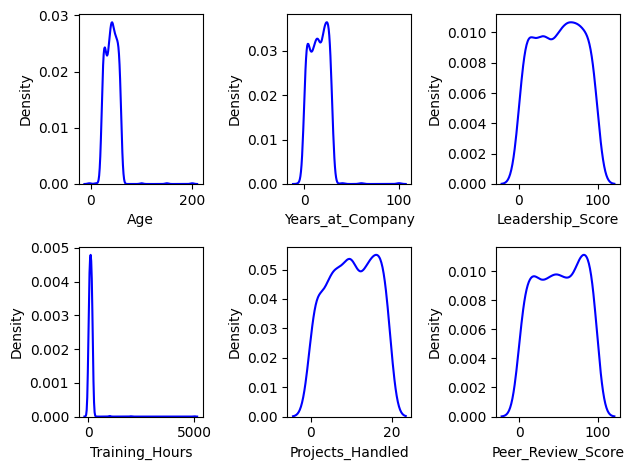

In [283]:
features =['Age', 'Years_at_Company',
       'Leadership_Score', 'Training_Hours', 'Projects_Handled',
       'Peer_Review_Score']
for i in range(0, len(features)):
    plt.subplot (2, 3, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

### 'Age' Analysis

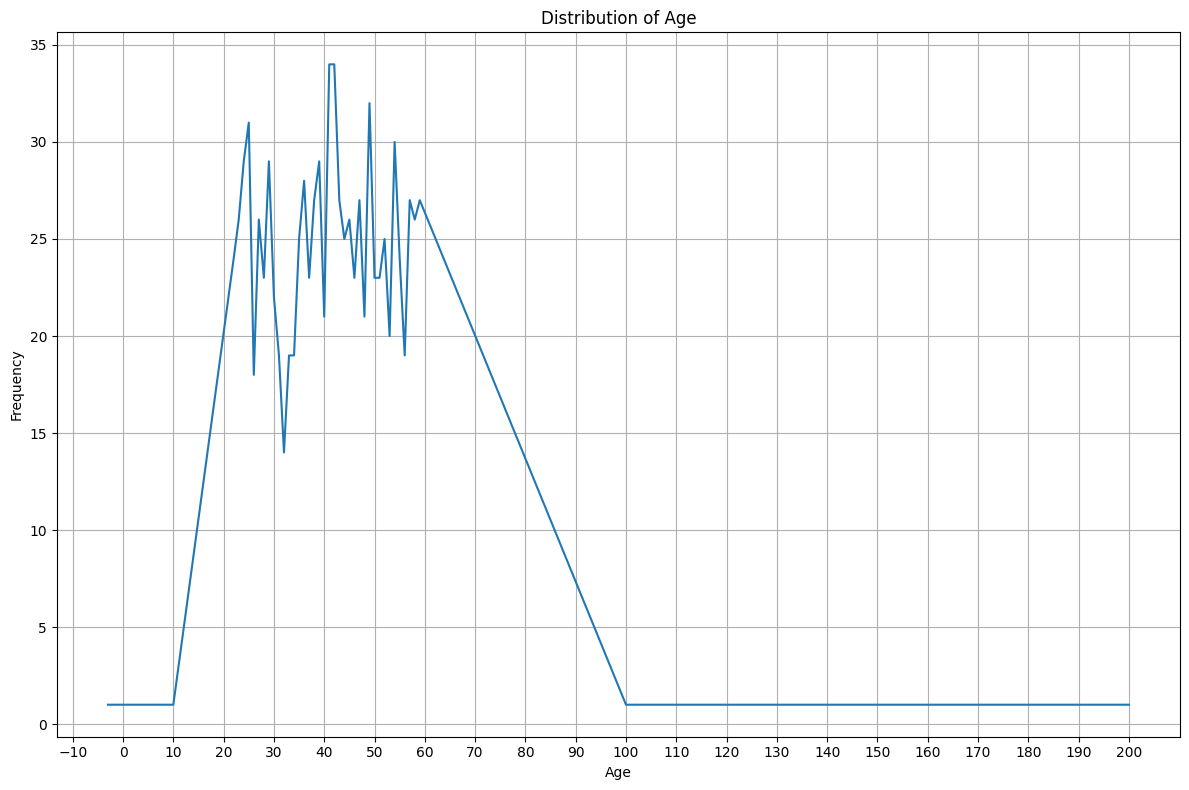

In [284]:
counts = (
    df['Age']
    .value_counts()
    .sort_index()
)
xmin = int(counts.index.min())
xmax = int(counts.index.max())

plt.figure(figsize=(12, 8))
plt.plot(counts.index, counts.values)

plt.xticks(range(xmin - xmin % 10, xmax + 10, 10))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.tight_layout()
plt.show()

### 'Years_at_Company' Analysis

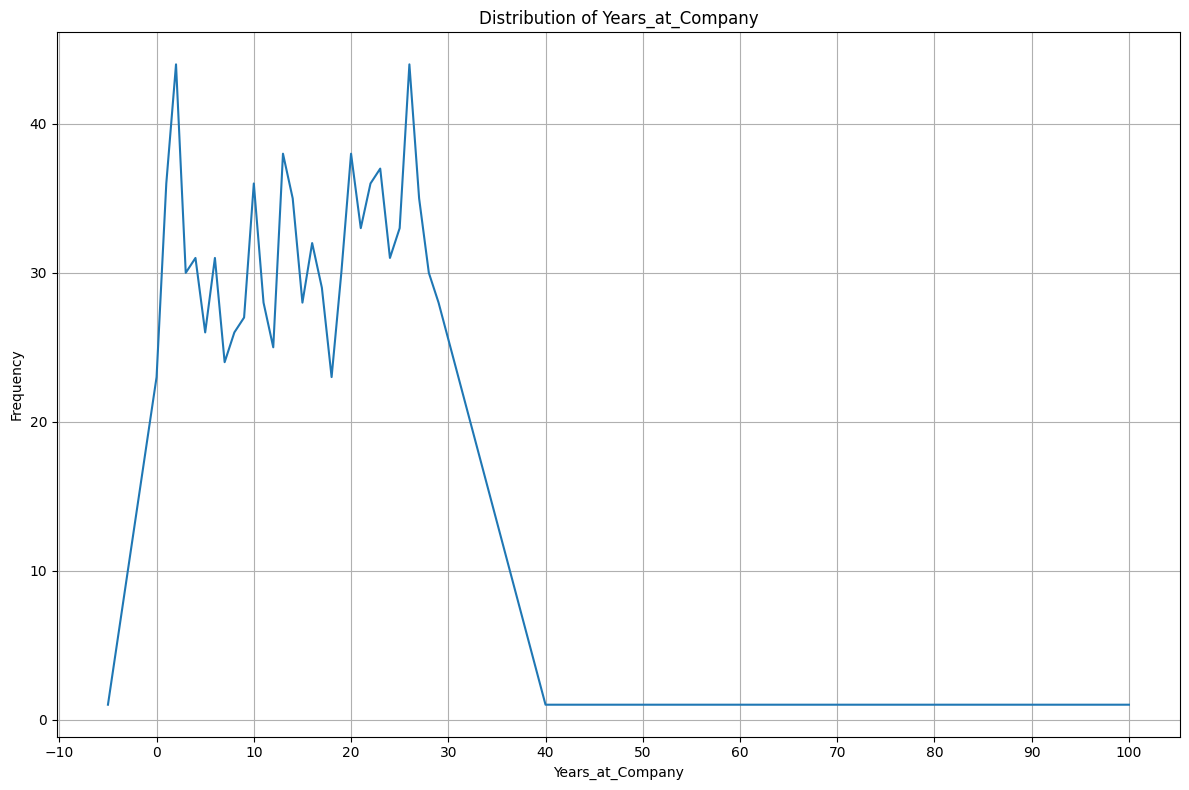

In [285]:
counts = (
    df['Years_at_Company']
    .value_counts()
    .sort_index()
)
xmin = int(counts.index.min())
xmax = int(counts.index.max())

plt.figure(figsize=(12, 8))
plt.plot(counts.index, counts.values)

plt.xticks(range(xmin - xmin % 10, xmax + 10, 10))
plt.xlabel('Years_at_Company')
plt.ylabel('Frequency')
plt.title('Distribution of Years_at_Company')
plt.grid(True)
plt.tight_layout()
plt.show()

### 'Performance_Score' Analysis

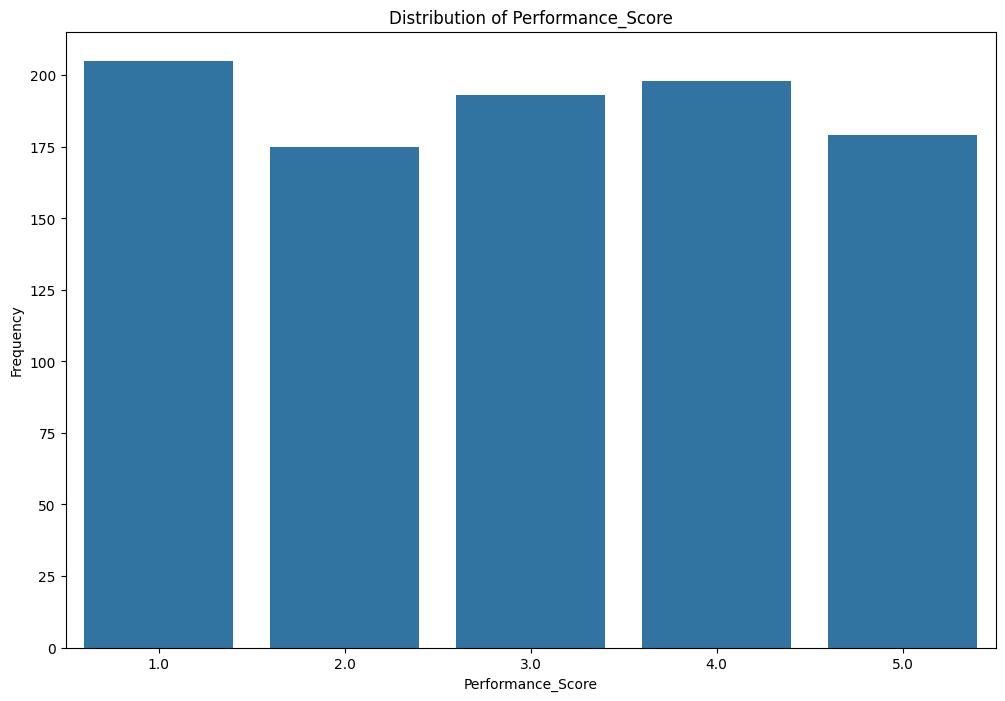

In [286]:
plt.figure(figsize=(12, 8))
plt.title('Distribution of Performance_Score')
plt.ylabel('Frequency')
sns.countplot(data=df, x="Performance_Score")
plt.show()

### 'Leadership_Score' Analysis

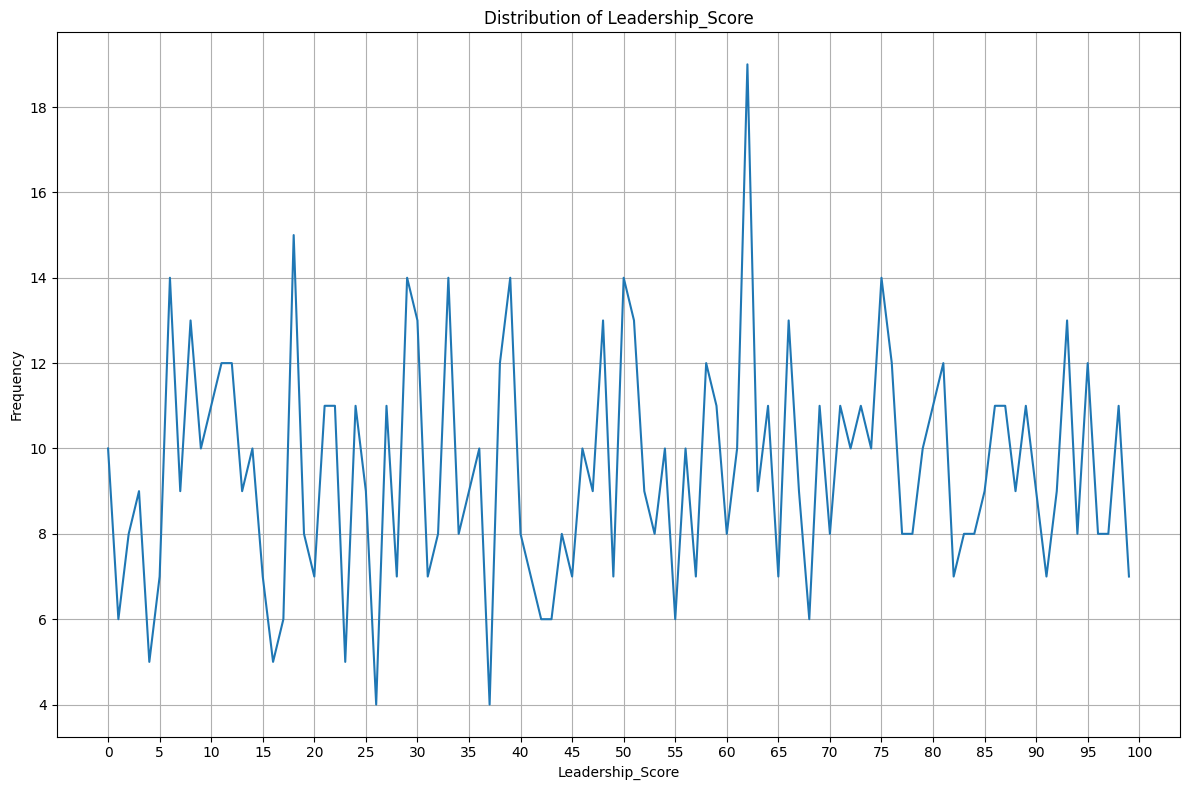

In [287]:
counts = (
    df['Leadership_Score']
    .value_counts()
    .sort_index()
)
xmin = int(counts.index.min())
xmax = int(counts.index.max())

plt.figure(figsize=(12, 8))
plt.plot(counts.index, counts.values)

plt.xticks(range(xmin - xmin % 5, xmax + 5, 5))
plt.xlabel('Leadership_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Leadership_Score')
plt.grid(True)
plt.tight_layout()
plt.show()

### 'Training_Hours' Analysis

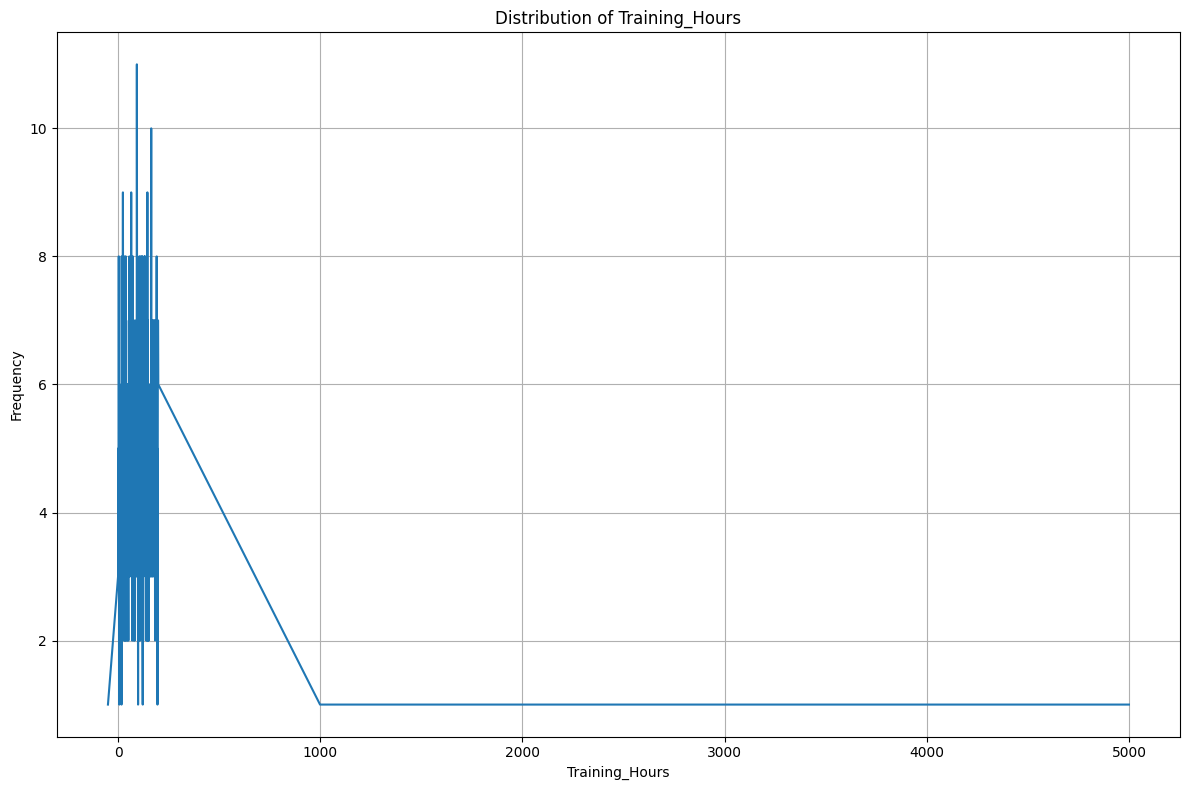

In [288]:
counts = (
    df['Training_Hours']
    .value_counts()
    .sort_index()
)
xmin = int(counts.index.min())
xmax = int(counts.index.max())

plt.figure(figsize=(12, 8))
plt.plot(counts.index, counts.values)

# plt.xticks(range(xmin - xmin % 5, xmax + 5, 5))
plt.xlabel('Training_Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Training_Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

### 'Projects_Handled' Analysis

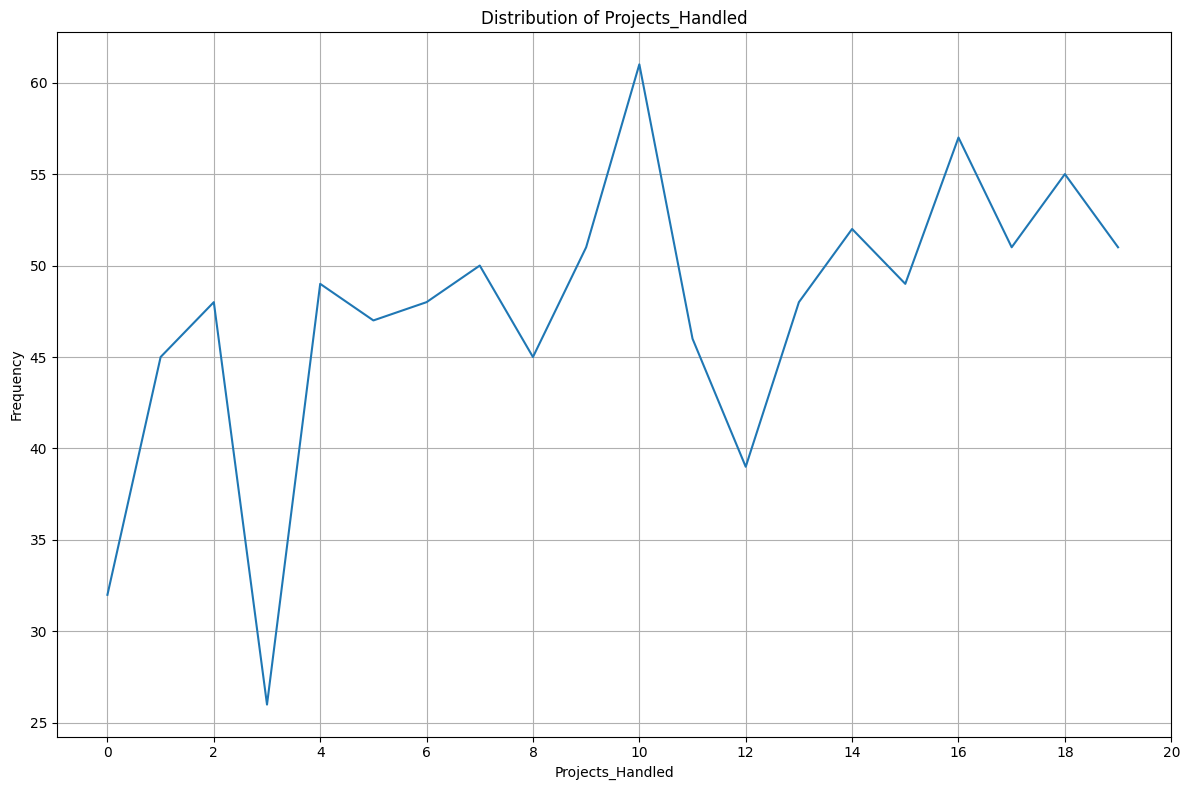

In [289]:
counts = (
    df['Projects_Handled']
    .value_counts()
    .sort_index()
)
xmin = int(counts.index.min())
xmax = int(counts.index.max())

plt.figure(figsize=(12, 8))
plt.plot(counts.index, counts.values)

plt.xticks(range(xmin - xmin % 2, xmax + 2, 2))
plt.xlabel('Projects_Handled')
plt.ylabel('Frequency')
plt.title('Distribution of Projects_Handled')
plt.grid(True)
plt.tight_layout()
plt.show()

### 'Peer_Review_Score' Analysis

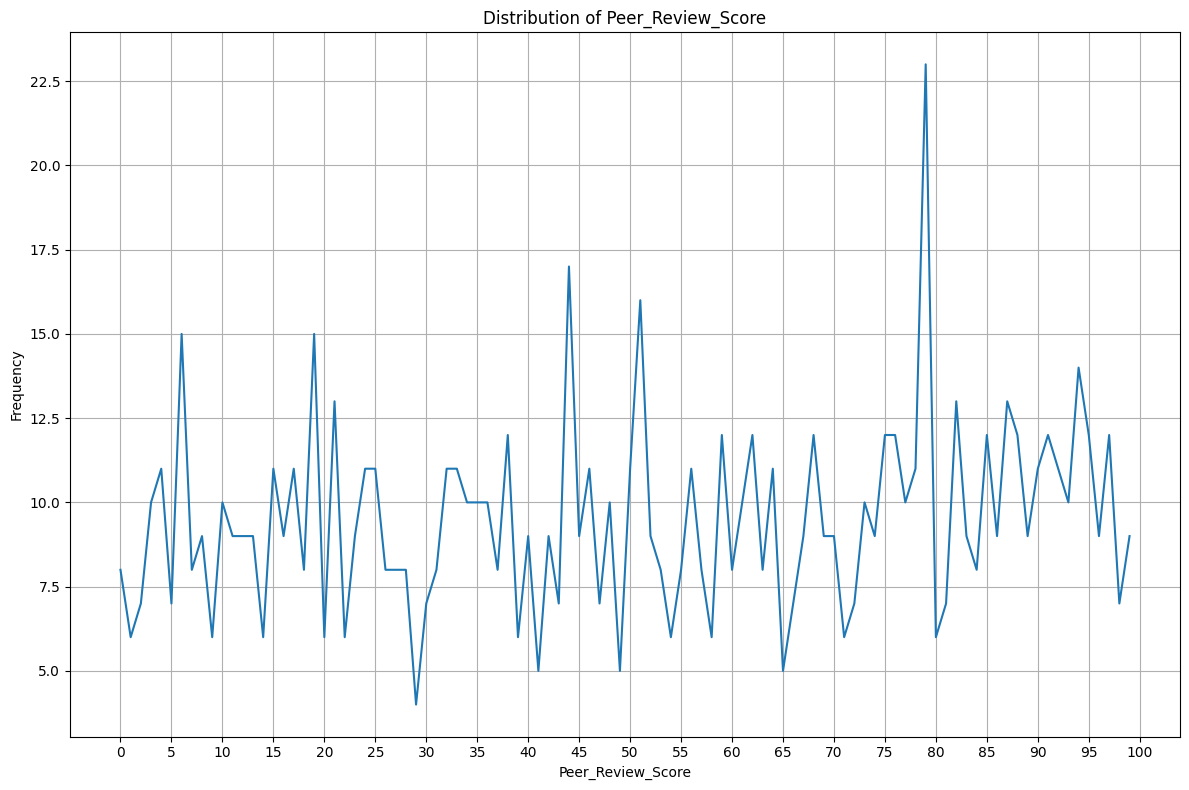

In [290]:
counts = (
    df['Peer_Review_Score']
    .value_counts()
    .sort_index()
)
xmin = int(counts.index.min())
xmax = int(counts.index.max())

plt.figure(figsize=(12, 8))
plt.plot(counts.index, counts.values)

plt.xticks(range(xmin - xmin % 5, xmax + 5, 5))
plt.xlabel('Peer_Review_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Peer_Review_Score')
plt.grid(True)
plt.tight_layout()
plt.show()

### 'Current_Position_Level' Analysis

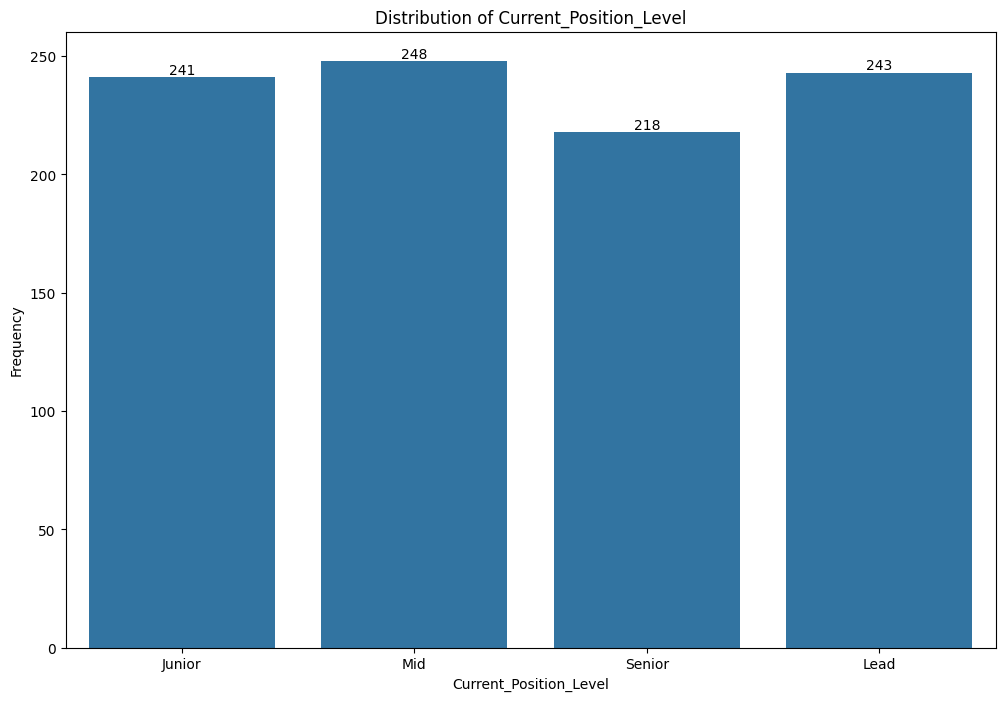

In [188]:
order = ["Junior", "Mid", "Senior", "Lead"]

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x="Current_Position_Level", order=order)
for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribution of Current_Position_Level')
plt.ylabel('Frequency')
plt.show()

### 'Promotion_Eligible' Analysis

In [189]:
df["Promotion_Eligible"] = df["Promotion_Eligible"].astype("Int64")

/tmp/ipython-input-2372958960.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[tick.get_text()] for tick in ax.get_xticklabels()])


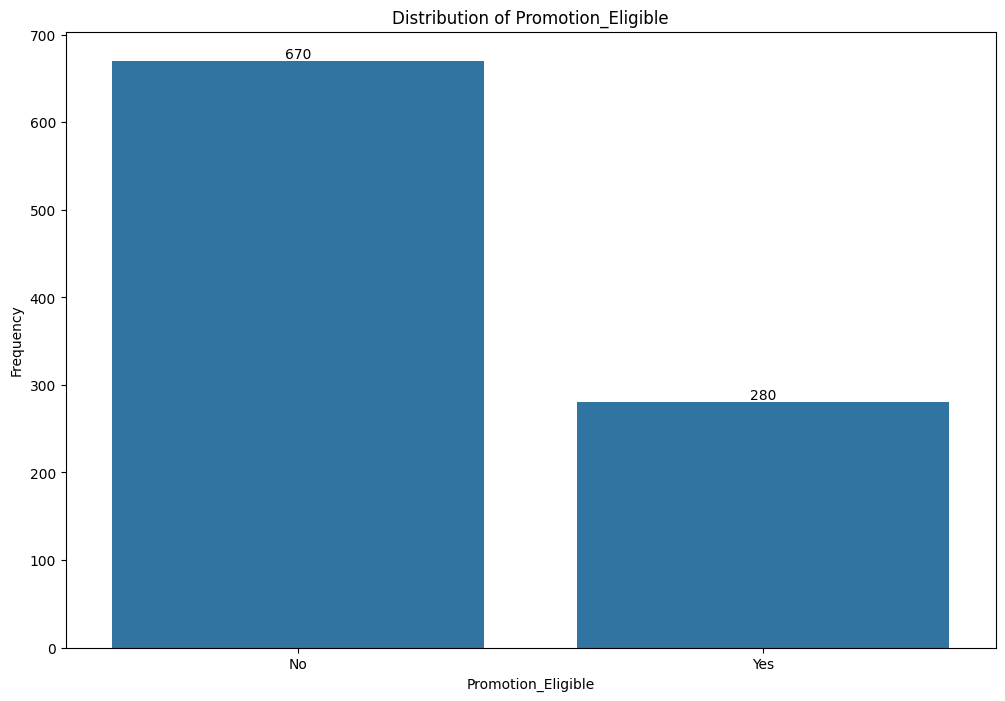

In [341]:
mapping = {
    '0.0': "No",
    '1.0': "Yes",
    '0': "No",
    '1': "Yes",
    0: "No",
    1: "Yes",
}

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x="Promotion_Eligible")
for container in ax.containers:
    ax.bar_label(container)

ax.set_xticklabels([mapping[tick.get_text()] for tick in ax.get_xticklabels()])
plt.title('Distribution of Promotion_Eligible')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis

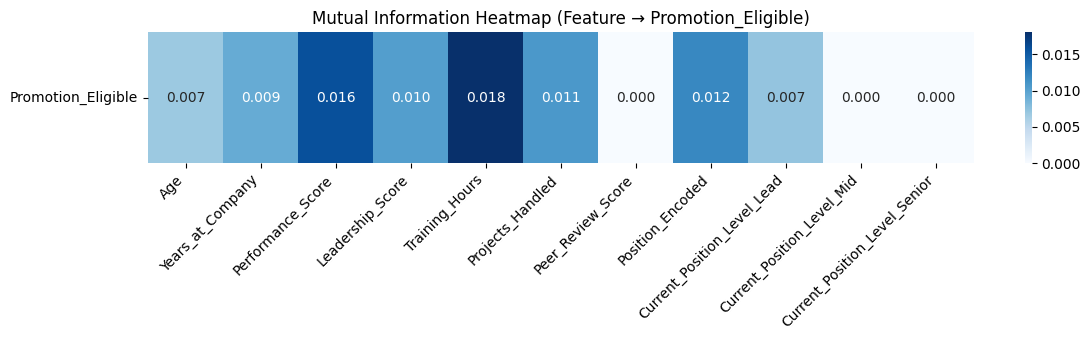

In [293]:
# Drop rows where the target is NaN
df_clean = df.dropna(subset=["Promotion_Eligible", "Age", "Years_at_Company", "Performance_Score", "Leadership_Score", "Performance_Score", "Training_Hours", "Projects_Handled", "Peer_Review_Score",
                             "Current_Position_Level"])

# Update X and y
X = df_clean.drop(columns=["Promotion_Eligible", "Employee_ID"])
X_ohe = pd.get_dummies(X, drop_first=True)

y = df_clean["Promotion_Eligible"]

mi = mutual_info_classif(X_ohe, y, random_state=42)

mi_df = pd.DataFrame([mi], columns=X_ohe.columns, index=["Promotion_Eligible"])

plt.figure(figsize=(12, 3.5))
sns.heatmap(mi_df, annot=True, fmt=".3f", cmap="Blues")
plt.title("Mutual Information Heatmap (Feature → Promotion_Eligible)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Multivariate Analysis

### Numerical Data Correlation

#### Label Encoding 'Current_Position_Level'

In [291]:
def label_encode_position(df):
  position_map = {
      "Junior": 0,
      "Mid": 1,
      "Senior": 2,
      "Lead": 3
  }

  df["Position_Encoded"] = df["Current_Position_Level"].map(position_map)

  return df

In [292]:
df = label_encode_position(df)

#### Heatmap

In [294]:
num_cols = ['Age', 'Years_at_Company', 'Performance_Score', 'Leadership_Score','Training_Hours', 'Projects_Handled',
            'Peer_Review_Score', 'Position_Encoded', 'Promotion_Eligible']

<Axes: >

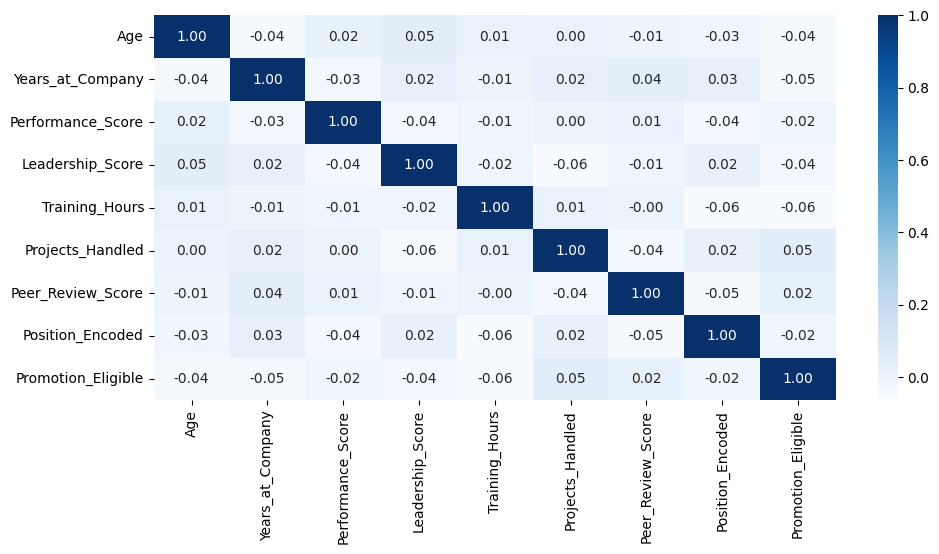

In [295]:
fig, (ax1) = plt.subplots(1, 1, figsize=(11, 5))
# sns.heatmap(df[num_cols].corr(), cmap='Blues', annot=True, fmt='.2f')
sns.heatmap(df[num_cols].corr(method="spearman"), cmap='Blues', annot=True, fmt='.2f')

#### Conclusion

From the *Heatmap* above, it is found that there are little linear/monotonic relationship across all columns.

### Categorical Data Correlation

#### Mutual Information

##### 'Age' Mutual Information Analysis

In [193]:
cols = ["Age", "Years_at_Company", "Performance_Score",
                "Leadership_Score", "Training_Hours", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]

df_mi = df[cols].dropna()

X = pd.get_dummies(
    df_mi[["Years_at_Company", "Performance_Score",
                "Leadership_Score", "Training_Hours", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]],
    drop_first=True
)
y = df_mi["Age"]

mi = mutual_info_regression(X, y, random_state=42)

pd.Series(mi, index=X.columns).sort_values(ascending=False)

,0
Training_Hours,0.003118
Promotion_Eligible,0.002452
Performance_Score,0.000355
Years_at_Company,0.000000
Projects_Handled,0.000000
Leadership_Score,0.000000
Peer_Review_Score,0.000000
Current_Position_Level_Lead,0.000000
Current_Position_Level_Mid,0.000000
Current_Position_Level_Senior,0.000000


###### Conclusion

The low Mutual Information score across all columns suggest nearly all columns does not tell us information regarding 'Age'. However, with knowledge of the industry, we can assume that a Junior is unlikely to be 55 and Lead is unlikely to be 22. Therefore, we will be using 'Current_Position_Level' to impute missing/invalid 'Age' values.

##### 'Years_at_Company' Mutual Information Analysis

In [194]:
cols = ["Age", "Years_at_Company", "Performance_Score",
                "Leadership_Score", "Training_Hours", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]

df_mi = df[cols].dropna()

X = pd.get_dummies(
    df_mi[["Age", "Performance_Score",
                "Leadership_Score", "Training_Hours", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]],
    drop_first=True
)
y = df_mi["Years_at_Company"]

mi = mutual_info_regression(X, y, random_state=42)

pd.Series(mi, index=X.columns).sort_values(ascending=False)

,0
Peer_Review_Score,0.055256
Performance_Score,0.053984
Projects_Handled,0.025881
Current_Position_Level_Senior,0.014648
Age,0.000000
Training_Hours,0.000000
Leadership_Score,0.000000
Promotion_Eligible,0.000000
Current_Position_Level_Lead,0.000000
Current_Position_Level_Mid,0.000000


###### Conclusion

The low Mutual Information score across all columns suggest nearly all columns does not tell us information regarding 'Years_at_Company'. To force imputing values with any of these columns might impose personal biases (e.g not all seniors might have good KPI scores)

##### 'Performance_Score' Mutual Information Analysis

In [195]:
cols = ["Age", "Years_at_Company", "Performance_Score",
                "Leadership_Score", "Training_Hours", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]

df_mi = df[cols].dropna()

X = pd.get_dummies(
    df_mi[["Age", "Years_at_Company",
                "Leadership_Score", "Training_Hours", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]],
    drop_first=True
)
y = df_mi["Performance_Score"]

mi = mutual_info_regression(X, y, random_state=42)

pd.Series(mi, index=X.columns).sort_values(ascending=False)

,0
Years_at_Company,0.053688
Age,0.039819
Training_Hours,0.021647
Peer_Review_Score,0.011142
Promotion_Eligible,0.010503
Current_Position_Level_Lead,0.009894
Projects_Handled,0.002675
Leadership_Score,0.000000
Current_Position_Level_Mid,0.000000
Current_Position_Level_Senior,0.000000


##### 'Leadership_Score' Mutual Information Analysis

In [196]:
cols = ["Age", "Years_at_Company", "Performance_Score",
                "Leadership_Score", "Training_Hours", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]

df_mi = df[cols].dropna()

X = pd.get_dummies(
    df_mi[["Age", "Years_at_Company",
                "Performance_Score", "Training_Hours", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]],
    drop_first=True
)
y = df_mi["Leadership_Score"]

mi = mutual_info_regression(X, y, random_state=42)

pd.Series(mi, index=X.columns).sort_values(ascending=False)

,0
Training_Hours,0.082972
Promotion_Eligible,0.016788
Current_Position_Level_Mid,0.005437
Current_Position_Level_Senior,0.001940
Years_at_Company,0.000000
Age,0.000000
Peer_Review_Score,0.000000
Projects_Handled,0.000000
Performance_Score,0.000000
Current_Position_Level_Lead,0.000000


##### 'Training_Hours' Mutual Information Analysis

In [197]:
cols = ["Age", "Years_at_Company", "Performance_Score",
                "Leadership_Score", "Training_Hours", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]

df_mi = df[cols].dropna()

X = pd.get_dummies(
    df_mi[["Age", "Years_at_Company",
                "Leadership_Score", "Performance_Score", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]],
    drop_first=True
)
y = df_mi["Training_Hours"]

mi = mutual_info_regression(X, y, random_state=42)

pd.Series(mi, index=X.columns).sort_values(ascending=False)

,0
Leadership_Score,0.083584
Promotion_Eligible,0.040384
Performance_Score,0.026784
Peer_Review_Score,0.026661
Age,0.003381
Current_Position_Level_Lead,0.001749
Years_at_Company,0.000000
Projects_Handled,0.000000
Current_Position_Level_Mid,0.000000
Current_Position_Level_Senior,0.000000


##### 'Projects_Handled' Mutual Information Analysis

In [198]:
cols = ["Age", "Years_at_Company", "Performance_Score",
                "Leadership_Score", "Training_Hours", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]

df_mi = df[cols].dropna()

X = pd.get_dummies(
    df_mi[["Age", "Years_at_Company",
                "Leadership_Score", "Performance_Score", "Training_Hours",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]],
    drop_first=True
)
y = df_mi["Projects_Handled"]

mi = mutual_info_regression(X, y, random_state=42)

pd.Series(mi, index=X.columns).sort_values(ascending=False)

,0
Peer_Review_Score,0.023354
Years_at_Company,0.013729
Promotion_Eligible,0.005045
Current_Position_Level_Senior,0.003746
Age,0.000000
Leadership_Score,0.000000
Training_Hours,0.000000
Performance_Score,0.000000
Current_Position_Level_Lead,0.000000
Current_Position_Level_Mid,0.000000


##### 'Peer_Review_Score' Mutual Information Analysis

In [199]:
cols = ["Age", "Years_at_Company", "Performance_Score",
                "Leadership_Score", "Training_Hours", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Promotion_Eligible"]

df_mi = df[cols].dropna()

X = pd.get_dummies(
    df_mi[["Age", "Years_at_Company",
                "Leadership_Score", "Performance_Score", "Projects_Handled",
                "Training_Hours", "Current_Position_Level", "Promotion_Eligible"]],
    drop_first=True
)
y = df_mi["Peer_Review_Score"]

mi = mutual_info_regression(X, y, random_state=42)

pd.Series(mi, index=X.columns).sort_values(ascending=False)

,0
Years_at_Company,0.067299
Training_Hours,0.022833
Projects_Handled,0.021636
Current_Position_Level_Lead,0.016471
Current_Position_Level_Mid,0.004515
Age,0.000000
Leadership_Score,0.000000
Performance_Score,0.000000
Promotion_Eligible,0.000000
Current_Position_Level_Senior,0.000000


##### 'Current_Position_Level' Mutual Information Analysis

In [200]:
cols = ["Age", "Years_at_Company", "Performance_Score",
                "Leadership_Score", "Training_Hours", "Projects_Handled",
                "Peer_Review_Score", "Current_Position_Level", "Position_Encoded", "Promotion_Eligible"]

df_mi = df[cols].dropna()

X = pd.get_dummies(
    df_mi[["Age", "Years_at_Company",
                "Leadership_Score", "Performance_Score", "Projects_Handled",
                "Training_Hours", "Peer_Review_Score", "Promotion_Eligible"]],
    drop_first=True
)
y = df_mi["Current_Position_Level"]

mi = mutual_info_classif(X, y, random_state=42)

pd.Series(mi, index=X.columns).sort_values(ascending=False)

KeyError: "['Position_Encoded'] not in index"

#### Visualization

In [201]:
continuous_vars = [
    "Age", "Years_at_Company", "Performance_Score",
    "Leadership_Score", "Training_Hours",
    "Projects_Handled", "Peer_Review_Score"
]

categorical_vars = [
    "Current_Position_Level",
    "Promotion_Eligible"
]

all_vars = continuous_vars + categorical_vars

In [202]:
mi_table = pd.DataFrame("-", index=all_vars, columns=all_vars)

for target in all_vars:

    predictors = [v for v in all_vars if v != target]
    df_mi = df[predictors + [target]].dropna()

    X = pd.get_dummies(df_mi[predictors], drop_first=True)
    y = df_mi[target]

    # choose MI function
    if target in categorical_vars:
        mi = mutual_info_classif(X, y, random_state=42)
    else:
        mi = mutual_info_regression(X, y, random_state=42)

    mi_series = pd.Series(mi, index=X.columns)

    # aggregate dummy variables back to original feature names
    for col in predictors:
        matching = mi_series.filter(like=col)
        if len(matching) > 0:
            mi_table.loc[target, col] = matching.mean()

In [203]:
mi_table

,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible
Age,-,0.0,0.000355,0.0,0.003118,0.0,0.0,0.0,0.002452
Years_at_Company,0.0,-,0.053984,0.0,0.0,0.025881,0.055256,0.004883,0.0
Performance_Score,0.039819,0.053688,-,0.0,0.021647,0.002675,0.011142,0.003298,0.010503
Leadership_Score,0.0,0.0,0.0,-,0.082972,0.0,0.0,0.002459,0.016788
Training_Hours,0.003381,0.0,0.02446,0.070101,-,0.0,0.026661,0.000583,0.040384
Projects_Handled,0.0,0.013729,0.0,0.0,0.0,-,0.023354,0.001249,0.005045
Peer_Review_Score,0.0,0.067299,0.0,0.0,0.024174,0.024109,-,0.006995,0.0
Current_Position_Level,0.0,0.0,0.042438,0.030557,0.000184,0.0,0.0,-,0.007916
Promotion_Eligible,0.003074,0.004737,0.0,0.017029,0.035177,0.0,0.0,0.009937,-


Conclusion

The joint Mutual Information analysis indicates that while most variables exhibit weak individual dependency with each other, meaningful shared information emerges when structural variables are considered together. In particular, Age and Current_Position_Level show moderate dependency with Years_at_Company, reflecting career progression constraints rather than performance-driven effects

# Data Cleaning

## Finding Invalid/Missing Values

In [296]:
def validate_data(df: pd.DataFrame) -> list[str]:
    errors = []

    # Check for missing values
    if df.isnull().any().any():
        null_cols = df.columns[df.isnull().any()].tolist()
        errors.append(
            f"Missing values found in columns: {', '.join(null_cols)}"
        )

    # Invalid numeric values
    numeric_cols = df.select_dtypes(include="number").columns
    if (df[numeric_cols] < 0).any().any():
        errors.append("Negative values found in numeric columns.")

    return errors

## Processing Invalid Rows & Columns

### Detecting Outlier Rows

#### Detecting Invalid 'Age'

In [297]:
# Fixing 'Age' being too high or too low by rewriting it into N/A, which will be updated again in 'Filling Null/Invalid 'Age'' section
def detect_limit_age(df):
  MIN_AGE = 18
  MAX_AGE = 65

  invalid_age_mask = (df["Age"] < MIN_AGE) | (df["Age"] > MAX_AGE)
  df.loc[invalid_age_mask, "Age"] = pd.NA

  return df

In [298]:
# Fixing improbable 'Age' value when compared to 'Years_at_Company'
def detect_limit_age_tenure(df):
  MIN_HIRE_AGE = 18

  # detect rows where tenure implies impossible hire age
  invalid_tenure_mask = (
      df["Age"].notna() &
      df["Years_at_Company"].notna() &
      ((df["Age"] - df["Years_at_Company"]) < MIN_HIRE_AGE)
  )

  # invalidate Years_at_Company in those rows
  df.loc[invalid_tenure_mask, "Age"] = pd.NA

  return df

#### Detecting Invalid 'Years_at_Company'

In [299]:
# Fixing 'Years_at_Company' being too high or too low by rewriting it into N/A, which will be updated again in 'Filling Null/Invalid 'Age'' section
def detect_limit_tenure(df):
  MIN_YEARS = 0
  MAX_YEARS = 47

  invalid_years_mask = (df["Years_at_Company"] < MIN_YEARS) | (df["Years_at_Company"] > MAX_YEARS)
  df.loc[invalid_years_mask, "Years_at_Company"] = pd.NA

  return df

#### Detecting Invalid 'Training_Hours'

In [300]:
# Deleting negative and anomalously high 'Training_Hours'
def detect_limit_training_hours(df):
  Q1 = df["Training_Hours"].quantile(0.25)
  Q3 = df["Training_Hours"].quantile(0.75)
  IQR = Q3 - Q1

  upper = Q3 + 1.5 * IQR

  df["Training_Hours"] = df["Training_Hours"].clip(lower=0, upper=upper)

  return df

### Setting Outlier Columns as Null

In [301]:
df = detect_limit_age(df)
df = detect_limit_age_tenure(df)
df = detect_limit_tenure(df)
df = detect_limit_training_hours(df)

### Deleting Damaged Rows

In [302]:
def delete_null_rows(df):
  df = df[df.isna().sum(axis=1) < 3].copy()

  return df

In [303]:
df = delete_null_rows(df)

In [304]:
# rows with 3 or more null values
rows_3plus_null = df[df.isna().sum(axis=1) >= 3]

rows_3plus_null

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible,Position_Encoded


## Fixing Columns

In [305]:
def fix_col(df, col_name):
  df[col_name] = df[col_name].fillna(
      df[col_name].median()
  )

  return df

## Fixing 'Age'

In [306]:
df.groupby('Current_Position_Level')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Current_Position_Level,,,,,,,,
Junior,170.0,44.276471,9.449337,22.0,38.0,45.5,51.0,59.0
Lead,157.0,44.178344,10.492673,22.0,36.0,45.0,53.0,59.0
Mid,186.0,45.505376,9.234042,22.0,39.0,47.0,53.0,59.0
Senior,138.0,43.789855,9.349228,22.0,38.0,45.0,51.0,59.0


### Filling Null/Invalid 'Age'

In [307]:
def fix_age(df):
  # Fill null 'Age' with the median value in their respective 'Current_Position_Level'
  median_age_by_level = (
      df.groupby("Current_Position_Level")["Age"]
        .median()
  )

  df["Age"] = df["Age"].fillna(
      df["Current_Position_Level"].map(median_age_by_level)
  )

  # After filling out Null/Invalid 'Age', the difference between 'Age' and 'Years_at_Company' might be less than 18, in that case
  # set 'Age' to be 'Years_at_Company' + 18
  invalid_rows = df[df['Age'] - df['Years_at_Company'] < 18]
  df.loc[invalid_rows.index, 'Age'] = df.loc[invalid_rows.index, 'Years_at_Company'] + 18

  # If 'Current_Position_Level' is null, then use median to fill out this column
  df["Age"] = df["Age"].fillna(
      df["Age"].median()
  )

  # Once 'Age' has been filled, make sure that it does not exceed 65
  df.loc[df['Age'] > 65, 'Age'] = 65

  return df

In [308]:
df = fix_age(df)

In [309]:
df[df["Age"].isna()]

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible,Position_Encoded


## Fixing 'Years_at_Company'

In [310]:
df.groupby('Current_Position_Level')['Years_at_Company'].describe()

,count,mean,std,min,25%,50%,75%,max
Current_Position_Level,,,,,,,,
Junior,228.0,14.144737,9.090399,0.0,5.0,15.0,22.0,29.0
Lead,229.0,14.327511,8.971308,0.0,7.0,14.0,22.0,40.0
Mid,237.0,14.890295,8.390660,0.0,8.0,15.0,22.0,29.0
Senior,196.0,16.000000,8.482259,0.0,10.0,17.0,24.0,29.0


### Filling Null/Invalid 'Years_at_Company'

In [311]:
df = fix_col(df, "Years_at_Company")

In [312]:
df[df["Years_at_Company"].isna()]

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible,Position_Encoded


## Fixing 'Performance_Score'

### Filling Null 'Performance_Score'

In [313]:
df = fix_col(df, "Performance_Score")

In [314]:
df[df["Performance_Score"].isna()]

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible,Position_Encoded


## Fixing 'Leadership_Score'

### Filling Null 'Leadership_Score'

In [315]:
df = fix_col(df, "Leadership_Score")

In [316]:
df[df["Leadership_Score"].isna()]

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible,Position_Encoded


## Fixing 'Training_Hours'

### Filling Null/Invalid 'Training_Hours'

In [317]:
df = fix_col(df, "Training_Hours")

In [318]:
df[df["Training_Hours"].isna()]

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible,Position_Encoded


## Fixing 'Projects_Handled'

### Filling Null 'Projects_Handled'

In [319]:
df = fix_col(df, "Projects_Handled")

In [320]:
df[df["Projects_Handled"].isna()]

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible,Position_Encoded


## Fixing 'Peer_Review_Score'

### Filling Null 'Peer_Review_Score'

In [321]:
df = fix_col(df, "Peer_Review_Score")

In [322]:
df[df["Peer_Review_Score"].isna()]

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible,Position_Encoded


## Fixing 'Current_Position_Level'

Since the distribution of this columns is mostly equal across all the categories, and the one column ('Age') that has a high MI score does not have meaningful difference for its median and mean.

It is decided to fill null values as 'Unknown'.

In [323]:
df.groupby('Current_Position_Level')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Current_Position_Level,,,,,,,,
Junior,237.0,44.658228,8.021506,22.0,41.0,45.5,49.0,59.0
Lead,239.0,44.560669,8.556012,22.0,42.0,45.0,49.5,59.0
Mid,246.0,45.869919,8.049803,22.0,42.0,47.0,51.0,59.0
Senior,214.0,44.294393,7.536594,22.0,42.0,45.0,47.0,59.0


### Filling Null 'Current_Position_Level'

In [324]:
def fix_col_level(df):
  df["Current_Position_Level"] = df["Current_Position_Level"].fillna("Unknown")

  return df

In [325]:
df = fix_col_level(df)

In [326]:
df.describe(include='object')

,Employee_ID,Current_Position_Level
count,961,961
unique,961,5
top,EMP1000,Mid
freq,1,246


# Feature Engineering

In [327]:
def feat_engineer(df):
  df["Avg_Score"] = df[["Performance_Score","Leadership_Score","Peer_Review_Score"]].mean(axis=1)
  df["Projects_per_Year"] = df["Projects_Handled"] / (df["Years_at_Company"] + 1)

  return df

In [328]:
df = feat_engineer(df)

# Feature Normalization

In [329]:
def feat_normal(df):
  df['Age_log'] = np.log1p(df['Age'])
  df['Years_at_Company_log'] = np.log1p(df['Years_at_Company'])
  df['Performance_Score_log'] = np.log1p(df['Performance_Score'])
  df['Leadership_Score_log'] = np.log1p(df['Leadership_Score'])
  df['Training_Hours_log'] = np.log1p(df['Training_Hours'])
  df['Projects_Handled_log'] = np.log1p(df['Projects_Handled'])
  df['Peer_Review_Score_log'] = np.log1p(df['Peer_Review_Score'])

  return df

In [330]:
df = feat_normal(df)

# One-Hot Encoding

In [331]:
def feat_encode(df):
  df = pd.get_dummies(df, columns=["Current_Position_Level"], drop_first=False)

  return df

In [332]:
df = feat_encode(df)

# Feature Scaling

In [333]:
def feat_scaling(df):
  df['Age_scaled'] = StandardScaler().fit_transform(df[['Age_log']])
  df['Years_at_Company_scaled'] = StandardScaler().fit_transform(df[['Years_at_Company_log']])
  df['Performance_Score_scaled'] = StandardScaler().fit_transform(df[['Performance_Score_log']])
  df['Leadership_Score_scaled'] = StandardScaler().fit_transform(df[['Leadership_Score_log']])
  df['Training_Hours_scaled'] = StandardScaler().fit_transform(df[['Training_Hours_log']])
  df['Projects_Handled_scaled'] = StandardScaler().fit_transform(df[['Projects_Handled_log']])
  df['Peer_Review_Score_scaled'] = StandardScaler().fit_transform(df[['Peer_Review_Score_log']])

  return df

In [334]:
df = feat_scaling(df)

# Feature Selection

In [335]:
def feat_select (df, col_list):
  df = df.drop(columns=col_list)

  return df

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Projects_per_Year               961 non-null    float64
 1   Current_Position_Level_Junior   961 non-null    bool   
 2   Current_Position_Level_Lead     961 non-null    bool   
 3   Current_Position_Level_Mid      961 non-null    bool   
 4   Current_Position_Level_Senior   961 non-null    bool   
 5   Current_Position_Level_Unknown  961 non-null    bool   
 6   Age_scaled                      961 non-null    float64
 7   Years_at_Company_scaled         961 non-null    float64
 8   Performance_Score_scaled        961 non-null    float64
 9   Leadership_Score_scaled         961 non-null    float64
 10  Training_Hours_scaled           961 non-null    float64
 11  Projects_Handled_scaled         961 non-null    float64
 12  Peer_Review_Score_scaled        961 non-n

In [337]:
df = feat_select(df, ['Employee_ID',  'Promotion_Eligible', 'Age_log', 'Years_at_Company_log', 'Performance_Score_log', 'Leadership_Score_log', 'Training_Hours_log',
                      'Projects_Handled_log', 'Peer_Review_Score_log', 'Position_Encoded', 'Avg_Score'])

# File Output

In [339]:
df.to_csv("Rakamin Bootcamp - Dataset - Promotion Dataset (Cleaned).csv", index=False)